In [35]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [36]:
## Combining the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how='inner', on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [37]:
## Filetering combined datasets by city type
urban_df = combined_df.loc[combined_df["type"] == "Urban", :]
suburban_df = combined_df.loc[combined_df["type"] == "Suburban", :]
rural_df = combined_df.loc[combined_df["type"] == "Rural", :]


In [38]:
## Getting aggregations and calculations for city type URBAN
group_urban_df = urban_df.groupby("city")
urban_count = group_urban_df["city"].count()
urban_mean = group_urban_df["fare"].mean()
urban_drivers = group_urban_df["driver_count"].sum()


In [39]:
## Getting aggregations and calculations for city type SUBURBAN
group_suburban_df = suburban_df.groupby("city")
suburban_count = group_suburban_df["city"].count()
suburban_mean = group_suburban_df["fare"].mean()
suburban_drivers = group_suburban_df["driver_count"].sum()


In [40]:
## Getting aggregations and calculations for city type RURAL
group_rural_df = rural_df.groupby("city")
rural_count = group_rural_df["city"].count()
rural_mean = group_rural_df["fare"].mean()
rural_drivers = group_rural_df["driver_count"].sum()

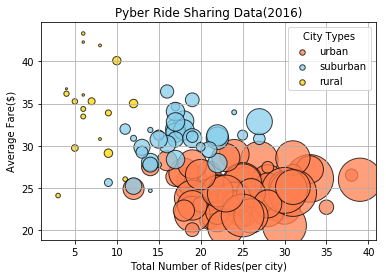

In [41]:
##Drawing the scatter plot as a bubble plot

plt.scatter(urban_count, urban_mean, marker="o", facecolors="coral", edgecolors="black",
            s=urban_drivers, alpha=0.75, label="urban")
plt.scatter(suburban_count, suburban_mean, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_drivers, alpha=0.75, label="suburban")
plt.scatter(rural_count, rural_mean, marker="o", facecolors="gold", edgecolors="black",
            s=rural_drivers, alpha=0.75, label="rural")

## LABELS
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")

##GRID AND AXIS
plt.grid()
plt.axis("auto")

#LEGEND
lgnd = plt.legend(title="City Types", loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#Save Figure
plt.savefig('bubble.png')

plt.show()

## Bubble Plot of Ride Sharing Data

In [11]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [42]:
#Calculate total fare
total_fare = combined_df["fare"].sum()
total_fare

63538.64

In [43]:
#Calculate percentage fares
group_type_df = combined_df.groupby("type")
perc_fares = round(((group_type_df["fare"].sum()/total_fare)*100),1)
perc_fares

type
Rural        6.8
Suburban    30.5
Urban       62.7
Name: fare, dtype: float64

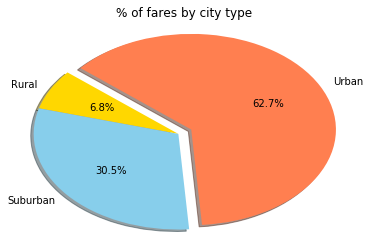

In [44]:
#Plot a Pie Chart

colors=["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = 'Rural', 'Suburban', 'Urban'

plt.pie(perc_fares, explode=explode,colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of fares by city type")
plt.axis("auto")
# Save Figure
plt.savefig('fares_by_city_type.png')
plt.show()

In [45]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


## Total Rides by City Type

In [46]:
#Calculate total rides
total_rides = combined_df["ride_id"].count()
total_rides

2375

In [47]:
#Calculate percentage rides by city type
group_type_df = combined_df.groupby("type")
perc_rides = round(((group_type_df["ride_id"].count()/total_rides)*100), 1)
perc_rides

type
Rural        5.3
Suburban    26.3
Urban       68.4
Name: ride_id, dtype: float64

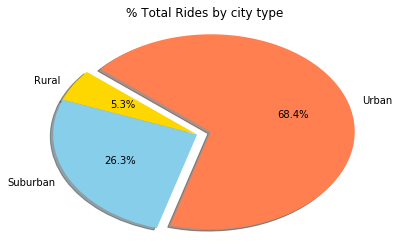

In [48]:
#Plot a pie chart
colors=["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = 'Rural', 'Suburban', 'Urban'

plt.pie(perc_rides, explode=explode,colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total Rides by city type")
plt.axis("auto")

#Save figure
plt.savefig('total_rides_by_city_type.png')
plt.show()

## Total Drivers by City Type

In [49]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [50]:
# Calculate total drivers
total_drivers = city_df["driver_count"].sum()
total_drivers

2973

In [51]:
# Get driver counts by grouping on city type
group_city_df = city_df.groupby("type")
driver_counts = group_city_df["driver_count"].sum()
driver_counts

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [52]:
# Get percentage drivers by city type
perc_drivers = round(((driver_counts/total_drivers)*100), 1)
perc_drivers

type
Rural        2.6
Suburban    16.5
Urban       80.9
Name: driver_count, dtype: float64

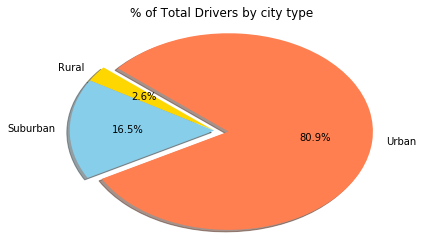

In [53]:
#Plot a pie chart
colors=["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = 'Rural', 'Suburban', 'Urban'

plt.pie(perc_drivers, explode=explode,colors=colors, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by city type")
plt.axis("auto")

#Save figure
plt.savefig('total_drivers_by_city_type.png')
plt.show()